# Project: WeRateDogs Twitter Data wrangling   


## Table of Contents
<ul>
<li><a href="#wrangling">Wrangling</a></li> 
    <ul>
        <li><a href="#archive">Twitter Archive Dataset</a></li> 
            <ul>  
                <li><a href="#gather1">Gather</a></li>
                <li><a href="#assess1">Assess</a></li>    
                <li><a href="#clean1">Clean</a></li>
                <li><a href="#store1">Store</a></li>
             </ul>  
      </ul>
      <ul>
          <li><a href="#extracting">Twitter Extracted Dataset</a></li>
              <ul>
                  <li><a href="#gather2">Gather</a></li>
                  <li><a href="#assess2">Assess</a></li>    
                  <li><a href="#clean2">Clean</a></li>
                  <li><a href="#store2">Store</a></li>
               </ul> 
        </ul> 
        <ul>
            <li><a href="#Image">Image Predictions Dataset</a></li>
                <ul>
                    <li><a href="#gather3">Gather</a></li>
                    <li><a href="#assess3">Assess</a></li>    
                    <li><a href="#clean3">Clean</a></li>
                    <li><a href="#store3">Store</a></li>
                 </ul> 
         </ul> 
         <ul>
             <li><a href="#master">Master Dataset</a></li>
             <ul>
                    <li><a href="#merge">Merge</a></li>
                    <li><a href="#assess4">Assess</a></li>    
                    <li><a href="#clean4">Clean</a></li>
                    <li><a href="#store4">Store</a></li>
                 </ul> 
             </ul>   
    
<li><a href="#dav">Master Dataset Analyzing and Visualizing</a></li> 
         <ul>
             <li><a href="#insight1">Insight 1: most stages of dog life are more popular</a></li>
             <li><a href="#insight2">Insight 2: most dog breeds are commonly on the WeRateDogs </a></li>
             <li><a href="#insight3">Insight 3: distribution of dog ratings out of ten</a></li>
             <li><a href="#insight4">Insight 4: account activity over the year</a></li>
         </ul>
</ul>

In [104]:
import datetime as dt
import json
import numpy as np
import pandas as pd
import re
import requests
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

<a id='wrangling'></a>
# Wrangling

<a id='archive'></a>
## Twitter Archive Dataset

<a id='gather1'></a>
### Gather

In [105]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


<a id='assess1'></a>
### Assess

There are 2356 tweets that rates people's dogs. These tweets are updated up to first of August, 2017. The most variables:

tweet_id is tweet unique identifier

rating_numerator is a dog rating which always have a denominator of 10

rating_denominator is a dog rating which always greater than 10

name is the name of dog

doggo, floofer, pupper, puppo are stages of dog

In [106]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [107]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
123,868880397819494401,NaN,NaN,2017-05-28 17:23:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. He won't start hydrotherapy wi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
2112,670435821946826752,NaN,NaN,2015-11-28 02:55:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two unbelievably athletic dogs here. Great for...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670435821...,10,10,None,None,None,None,None
1759,678740035362037760,NaN,NaN,2015-12-21 00:53:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tango. He's a large dog. Doesn't care muc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678740035...,6,10,Tango,None,None,None,None
1722,680115823365742593,NaN,NaN,2015-12-24 20:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ozzy. He woke up 2 minutes before he h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680115823...,9,10,Ozzy,None,None,None,None
1394,700002074055016451,NaN,NaN,2016-02-17 17:01:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Thumas. He covered himself in nanners ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700002074...,9,10,Thumas,None,None,None,None


In [108]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Buddy         7
Bailey        7
Daisy         7
an            7
Toby          7
Stanley       6
Rusty         6
Leo           6
Oscar         6
Jack          6
Jax           6
Scout         6
Bella         6
Milo          6
Koda          6
Dave          6
Phil          5
           ... 
Remus         1
Wiggles       1
Nimbus        1
Robin         1
Mitch         1
Yukon         1
Billl         1
Ridley        1
Grady         1
Creg          1
Carbon        1
Hector        1
Skittles      1
Dutch         1
Callie        1
Mack          1
Snickers      1
Flash         1
Binky         1
Scott         1
Lambeau       1
Noah          1
Joshwa        1
Rontu         1
Bodie         1
Dug           1
Ziva          1
Liam          1
Jarod         1
Bilbo         1
Name: name, Length: 957,

In [109]:
twitter_archive.in_reply_to_status_id.isnull().sum()

2278

In [110]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [111]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

### Observations

**Quality Issues:**

1- The type of timestamp column should be a datetime instead of an object

2- Getting rid of useless columns

3- The type of numerator and denominator columns be a float 

4- Removing any extreme values from the numerator and denominator columns

5- Removing tweets that contain more than one rating

6- Some extracted data in rating numerator column has just decimal value 

7- Replacing all unsuitable names to none

**Tidiness Issues:**

1- doggo, floofer, pupper, puppo are stages of dog that can be merged in one column

2- Combining all three data sources in one table 

<a id='clean1'></a>
### Clean

**Define:** 

Converting timestamp to datetime object and  tweet_id to string

In [112]:
twitter_archive.timestamp = pd.to_datetime(twitter_archive.timestamp)
twitter_archive['tweet_id'] = twitter_archive['tweet_id'].astype('str')

**Test:** 

twitter_archive_clean.info()

**Define:** 

Merging columns to Dog stage column

**Code:** 

In [113]:
# function that add the data of each four columns with comma if there is more one value in the list (stage) if they are not none
def dog_stages(row):
    stage = []
    if row['doggo'] == 'doggo':
        stage.append('doggo')
    if row['floofer'] == 'floofer':
        stage.append('floofer')
    if row['pupper'] == 'pupper':
        stage.append('pupper')
    if row['puppo'] == 'puppo':
        stage.append('puppo')
    
    if not stage:
        return "None"
    else:
        return ','.join(stage)
# using lambda function to check all records in four columns    
twitter_archive['dog_stage'] = twitter_archive.apply(lambda row: dog_stages(row), axis=1)

**Test:** 

In [114]:
twitter_archive['dog_stage'].value_counts()

None             1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [115]:
# removing extra columns
twitter_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [116]:
# Confirm contact column is gone
list(twitter_archive)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

**Define:** 

Getting rid of useless columns

In [117]:
twitter_archive['in_reply_to_user_id'].value_counts().sum()

78

In [118]:
twitter_archive['in_reply_to_status_id'].value_counts()

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
8.265984e+17    1
6.780211e+17    1
6.689207e+17    1
6.658147e+17    1
6.737159e+17    1
7.590995e+17    1
8.862664e+17    1
7.384119e+17    1
7.727430e+17    1
7.468859e+17    1
8.634256e+17    1
6.693544e+17    1
6.914169e+17    1
6.920419e+17    1
6.753494e+17    1
7.291135e+17    1
8.406983e+17    1
6.747400e+17    1
7.501805e+17    1
6.744689e+17    1
7.638652e+17    1
6.747934e+17    1
8.503288e+17    1
6.747522e+17    1
8.816070e+17    1
               ..
8.380855e+17    1
8.211526e+17    1
8.558616e+17    1
8.558585e+17    1
7.032559e+17    1
6.678065e+17    1
8.018543e+17    1
7.667118e+17    1
6.855479e+17    1
6.717299e+17    1
6.715610e+17    1
6.758457e+17    1
6.924173e+17    1
7.476487e+17    1
8.381455e+17    1
6.903413e+17    1
8.476062e+17    1
8.352460e+17    1
6.813394e+17    1
8.795538e+17    1
6.860340e+17    1
8.571567e+17    1
6.765883e+17    1
7.044857e+17    1
8.707262e+

In [119]:
twitter_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

**Test:**

In [120]:
# Confirm contact column is gone
list(twitter_archive)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

**Define:**

Rating of numerator and denominator columns should be float types

**Code:**

In [121]:
twitter_archive['rating_numerator'] = twitter_archive['rating_numerator'].astype(float)

**Test**

In [122]:
twitter_archive.rating_numerator.value_counts()

12.0      558
11.0      464
10.0      461
13.0      351
9.0       158
8.0       102
7.0        55
14.0       54
5.0        37
6.0        32
3.0        19
4.0        17
1.0         9
2.0         9
75.0        2
15.0        2
420.0       2
0.0         2
144.0       1
666.0       1
121.0       1
182.0       1
165.0       1
17.0        1
45.0        1
204.0       1
960.0       1
1776.0      1
84.0        1
24.0        1
27.0        1
88.0        1
99.0        1
50.0        1
80.0        1
60.0        1
44.0        1
20.0        1
26.0        1
143.0       1
Name: rating_numerator, dtype: int64

In [123]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

**Define:**

Removing any extreme values from the numertor and denuminator columns

**Code:**

In [124]:
twitter_archive = twitter_archive[twitter_archive['rating_numerator'] != 0 ]
twitter_archive = twitter_archive[twitter_archive['rating_denominator'] <= 100 ]
twitter_archive = twitter_archive[twitter_archive['rating_numerator'] <= 100 ]

**Test:**

In [125]:
len(twitter_archive[twitter_archive['rating_numerator'] > 100 ])

0

**Define:** 

Removing tweets that contain more than one rating

**Code:**

In [126]:
# creating a list of all ratings in each tweet

ratings = []
for index in twitter_archive.index.tolist():
    rate = re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', twitter_archive.loc[index, 'text'])     
    ratings.append(rate)
twitter_archive['rating'] = ratings    

In [127]:
# Getting tweets that have more than one rating
more_rates = []
for index in twitter_archive.index.tolist():
    if len(twitter_archive.loc[index, 'rating']) > 1:
        more_rates.append(index)

In [128]:
# Printing out these tweets:
twitter_archive.loc[more_rates, ['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
55,@roushfenway These are good dogs but 17/10 is ...,17.0,10
561,"RT @dog_rates: ""Yep... just as I suspected. Yo...",12.0,10
766,"""Yep... just as I suspected. You're not flossi...",12.0,10
860,RT @dog_rates: Meet Eve. She's a raging alcoho...,8.0,10
1007,This is Bookstore and Seaweed. Bookstore is ti...,10.0,10
1165,Happy 4/20 from the squad! 13/10 for all https...,4.0,20
1202,This is Bluebert. He just saw that both #Final...,50.0,50
1222,Meet Travis and Flurp. Travis is pretty chill ...,10.0,10
1359,This is Socks. That water pup w the super legs...,9.0,10
1459,This may be the greatest video I've ever been ...,4.0,10


In [129]:
len(more_rates)

28

In [130]:
# Removing these tweets:
twitter_archive = twitter_archive[~twitter_archive.index.isin(more_rates)]

In [131]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2315 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2315 non-null object
timestamp                     2315 non-null datetime64[ns, UTC]
source                        2315 non-null object
text                          2315 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2262 non-null object
rating_numerator              2315 non-null float64
rating_denominator            2315 non-null int64
name                          2315 non-null object
dog_stage                     2315 non-null object
rating                        2315 non-null object
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(8)
memory usage: 253.2+ KB


In [132]:
# Dropping rating column
twitter_archive = twitter_archive.drop('rating', axis=1)

**Define:**

Updating rating numerator data that extracted just decimal value from the text column

**Code:**

In [133]:
# searching for text has a rating numerator was extracted just its decimal value
text_err = twitter_archive[twitter_archive['text'].str.contains(r"\d+\.\d*\/\d+")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]
# Displaying data with maximum width of column 
with pd.option_context('max_colwidth', 200): display(text_err)

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75.0,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10


In [134]:
# Updating rating numerators values
twitter_archive.loc[(twitter_archive.tweet_id == '883482846933004288'), 'rating_numerator'] = 13.5
twitter_archive.loc[(twitter_archive.tweet_id == '832215909146226688'), 'rating_numerator'] = 9.75
twitter_archive.loc[(twitter_archive.tweet_id == '786709082849828864'), 'rating_numerator'] = 9.75
twitter_archive.loc[(twitter_archive.tweet_id == '778027034220126208'), 'rating_numerator'] = 11.27
twitter_archive.loc[(twitter_archive.tweet_id == '681340665377193984'), 'rating_numerator'] = 9.5
twitter_archive.loc[(twitter_archive.tweet_id == '680494726643068929'), 'rating_numerator'] = 11.26

**Test:**

In [135]:
twitter_archive.query("tweet_id == '832215909146226688'")

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
340,832215909146226688,2017-02-16 13:11:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None


**Define:**

Replacing all unsuitable names to none

**Code:**

In [136]:
unsuitable =[]
unsuitable =twitter_archive[twitter_archive.name.str.islower()==True]['name'].unique()
unsuitable 

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'unacceptable',
       'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life',
       'light', 'space'], dtype=object)

In [137]:
for x in unsuitable:
    twitter_archive.name.replace(x, 'None',inplace=True)

**Test:**

In [138]:
twitter_archive.name.value_counts()

None        829
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Penny        10
Lola         10
Tucker       10
Bo            9
Winston       9
Sadie         8
Toby          7
Bailey        7
Daisy         7
Buddy         7
Stanley       6
Leo           6
Scout         6
Rusty         6
Oscar         6
Jack          6
Jax           6
Dave          6
Koda          6
Milo          6
Bella         6
Finn          5
Phil          5
Alfie         5
Sammy         5
           ... 
Dallas        1
Jo            1
Tupawc        1
Stark         1
Remus         1
Wiggles       1
Scott         1
Jarod         1
Liam          1
Ziva          1
Poppy         1
Sage          1
Creg          1
Carbon        1
Hector        1
Skittles      1
Dutch         1
Callie        1
Mack          1
Snickers      1
Flash         1
Grady         1
Binky         1
Lambeau       1
Noah          1
Joshwa        1
Rontu         1
Bodie         1
Dug           1
Bilbo         1
Name: name, Length: 920,

<a id='store1'></a>
### Store

In [139]:
twitter_archive_clean = twitter_archive.copy()

<a id='extracting'></a>
## Twitter Extracted Dataset

<a id='gather2'></a>
### Gather

In [140]:
# Read text file line by line to create dataframe
tweets = []
with open('tweet_json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets.append(tweet)
        except:
            continue
twitter_extr = pd.DataFrame(tweets, columns=list(tweets[0].keys()))

twitter_extr.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6514,33819,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4328,25461,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8964,42908,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,9774,41048,False,False,False,False,en


<a id='assess2'></a>
### Assess

In [141]:
twitter_extr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 27 columns):
created_at                       2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null object
coordinates                      0 non-null

### Observations

**Tidiness Issues**

1- Removing unnecessary columns in the table

2- Renaming column names for merging purposes

### Clean

**Define:**

Leaving only three columns in the table to study 

**Code:**

In [142]:
# Reducing twitter extracted file to the necessary columns
twitter_extr = twitter_extr[['id', 'favorite_count', 'retweet_count']]

# set all columns to string with astype()
twitter_extr['id'] = twitter_extr['id'].astype('str')
twitter_extr['favorite_count'] = twitter_extr['favorite_count'].astype('str')
twitter_extr['retweet_count'] = twitter_extr['retweet_count'].astype('str')

**Test:**

In [143]:
twitter_extr.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


**Define:**

Columns name changing

**Code:**

In [144]:
twitter_extr.rename(columns={ 'id': 'tweet_id', 'favorite_count': 'likes', 'retweet_count': 'retweets'}, inplace=True)

**Test:**

In [145]:
list(twitter_extr)

['tweet_id', 'likes', 'retweets']

<a id='store2'></a>
### Store

In [146]:
twitter_extr_clean = twitter_extr.copy()

<a id='Image'></a>
## Image Predictions Dataset

<a id='gather3'></a>
### Gather

In [147]:
# Downloading the file programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

# Reading the file
img_pred = pd.read_csv('image-predictions.tsv', sep='\t' )
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='assess3'></a>
### Assess

In [148]:
img_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
118,668154635664932864,https://pbs.twimg.com/media/CUXDGR2WcAAUQKz.jpg,1,Arctic_fox,0.473584,False,wallaby,0.261411,False,white_wolf,0.080948,False
830,693629975228977152,https://pbs.twimg.com/media/CaBEx3SWEAILZpi.jpg,1,pug,0.841987,True,French_bulldog,0.069791,True,Boston_bull,0.038720,True
1513,786595970293370880,https://pbs.twimg.com/media/CuqM0fVWAAAboKR.jpg,1,Pembroke,0.709512,True,Cardigan,0.287178,True,chow,0.000570,True
1322,756526248105566208,https://pbs.twimg.com/media/Cn-4m2CXYAErPGe.jpg,1,geyser,0.991273,False,volcano,0.004673,False,fountain,0.001234,False
854,696488710901260288,https://pbs.twimg.com/media/CapsyfkWcAQ41uC.jpg,1,briard,0.369063,True,Scotch_terrier,0.168204,True,giant_schnauzer,0.120553,True


In [149]:
img_pred.shape

(2075, 12)

In [150]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [151]:
img_pred['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

### Observations

**Quality Issues:**

1- Many unwanted signs (underscore and hyphen) breed prediction columns.

**Tidiness Issues:**

1- The columns for dog breed predictions can be merged.

<a id='clean3'></a>
### Clean

**Define:**

Merging all dog breed predictions in one column as well as their confident predictions 

**Code:**

In [152]:
breed_pre = []
conf_pre = []

def pre_merg(row):
    if row['p1_dog']:
        breed_pre.append(row['p1'])
        conf_pre.append(row['p1_conf'])
    elif row['p2_dog']:
        breed_pre.append(row['p2'])
        conf_pre.append(row['p2_conf'])
    elif row['p3_dog']:
        breed_pre.append(row['p3'])
        conf_pre.append(row['p3_conf'])
    else:
        breed_pre.append('Unidentifiable')
        conf_pre.append(0)

img_pred.apply(pre_merg, axis = 1)

img_pred['breed_pre'] = breed_pre
img_pred['confidence_pre'] = conf_pre

In [153]:
# Dropping the processed columns
img_pred.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis=1, inplace=True)
img_pred['tweet_id'] = img_pred['tweet_id'].astype('str')

**Test:**

In [154]:
img_pred.sample(5)

,tweet_id,jpg_url,img_num,breed_pre,confidence_pre
702,684902183876321280,https://pbs.twimg.com/media/CYFC5lmWAAAEIho.jpg,1,Pembroke,0.708034
1863,842846295480000512,https://pbs.twimg.com/media/C7JkO0rX0AErh7X.jpg,1,Labrador_retriever,0.461076
1005,709042156699303936,https://pbs.twimg.com/media/CdcGBB3WwAAGBuU.jpg,1,Rottweiler,0.068179
1399,768596291618299904,https://pbs.twimg.com/media/CqqaPjqWIAAOyNL.jpg,1,Great_Pyrenees,0.729745
348,672481316919734272,https://pbs.twimg.com/media/CVUiMUeW4AEQgkU.jpg,1,Border_collie,0.599454


**Define:**

Replacing underscore and hyphen signs with white space in breed_pre column

**Code:**

In [155]:
img_pred.breed_pre= img_pred.breed_pre.str.replace('_',' ')
img_pred.breed_pre= img_pred.breed_pre.str.replace('-',' ')

**Test:**

In [156]:
img_pred.sample(5)

,tweet_id,jpg_url,img_num,breed_pre,confidence_pre
659,682393905736888321,https://pbs.twimg.com/media/CXhZom1UwAA4Zz6.jpg,1,vizsla,0.657275
1537,790698755171364864,https://pbs.twimg.com/media/CvkgUjbUsAEvo7l.jpg,1,Bernese mountain dog,0.996541
367,672964561327235073,https://pbs.twimg.com/media/CVbZsouWUAIsxMc.jpg,1,Chihuahua,0.292343
1664,812466873996607488,https://pbs.twimg.com/media/C0Z2T_GWgAAxbL9.jpg,1,Great Dane,0.078205
1344,759099523532779520,https://pbs.twimg.com/media/Cojc_Q0WcAAqi_K.jpg,1,Shetland sheepdog,0.129034


<a id='store3'></a>
### Store

In [157]:
img_pred_clean = img_pred.copy()

<a id='master'></a>
## Master Dataset

<a id='merging'></a>
### Merging Datasets

Combining img_pred_clean and twitter_extr_clean to twitter_archive_clean using merge function 

In [158]:
twitter_archive_master = pd.merge(twitter_archive_clean, img_pred_clean, on=['tweet_id'], how='inner')
twitter_archive_master = pd.merge(twitter_archive_master, twitter_extr_clean, on = 'tweet_id', how = 'inner' )

**Assess**

In [159]:
twitter_archive_master.sample(5)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed_pre,confidence_pre,likes,retweets
861,741743634094141440,2016-06-11 21:27:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Aqua. She's a sandy pupper. Not sure how ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741743634...,11.0,10,Aqua,pupper,https://pbs.twimg.com/media/Cksz42EW0AAh2NF.jpg,1,Labrador retriever,0.786089,8945,3144
234,837482249356513284,2017-03-03 01:58:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. He's a ship captain in real l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837482249...,13.0,10,Waffles,None,https://pbs.twimg.com/media/C59VqMUXEAAzldG.jpg,2,Unidentifiable,0.000000,4204,495
92,871515927908634625,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12.0,10,Napolean,doggo,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2,komondor,0.974781,20730,3628
1728,671763349865160704,2015-12-01 18:50:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mark. He's a good dog. Always rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671763349...,9.0,10,Mark,None,https://pbs.twimg.com/media/CVKVM3NW4AAdi1e.jpg,1,Unidentifiable,0.000000,1788,999
1694,672591271085670400,2015-12-04 01:40:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Lots of pups here. All are Judea Hazelnuts. Ex...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672591271...,8.0,10,None,None,https://pbs.twimg.com/media/CVWGMQMWUAA7aOM.jpg,1,Unidentifiable,0.000000,782,207


In [160]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039 entries, 0 to 2038
Data columns (total 18 columns):
tweet_id                      2039 non-null object
timestamp                     2039 non-null datetime64[ns, UTC]
source                        2039 non-null object
text                          2039 non-null object
retweeted_status_id           78 non-null float64
retweeted_status_user_id      78 non-null float64
retweeted_status_timestamp    78 non-null object
expanded_urls                 2039 non-null object
rating_numerator              2039 non-null float64
rating_denominator            2039 non-null int64
name                          2039 non-null object
dog_stage                     2039 non-null object
jpg_url                       2039 non-null object
img_num                       2039 non-null int64
breed_pre                     2039 non-null object
confidence_pre                2039 non-null float64
likes                         2039 non-null object
retweets         

In [161]:
twitter_archive_master.describe()

,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,confidence_pre
count,7.800000e+01,7.800000e+01,2039.000000,2039.000000,2039.000000,2039.000000
mean,7.661909e+17,1.009567e+16,10.838538,10.186856,1.204022,0.463883
std,5.919174e+16,8.916249e+16,4.331107,3.424770,0.563498,0.339353
min,6.675094e+17,7.832140e+05,1.000000,2.000000,1.000000,0.000000
25%,7.122010e+17,4.196984e+09,10.000000,10.000000,1.000000,0.139761
50%,7.801500e+17,4.196984e+09,11.000000,10.000000,1.000000,0.459515
75%,8.069874e+17,4.196984e+09,12.000000,10.000000,1.000000,0.772204
max,8.768508e+17,7.874618e+17,99.000000,90.000000,4.000000,0.999956


**Observations**

1- removing unnecessary columns

**Clean:**

**Define**

Removing unnecessary columns from the dataset (retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp)

**Code**

In [162]:
# Dropping unnecessary columns 
twitter_archive_master.drop(['retweeted_status_id','retweeted_status_timestamp', 'retweeted_status_user_id' ], axis=1, inplace=True)

**Test**

In [163]:
list(twitter_archive_master)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'jpg_url',
 'img_num',
 'breed_pre',
 'confidence_pre',
 'likes',
 'retweets']

<a id='store4'></a>
### Store

Saving twitter_archive_master dataset to csv file

In [164]:
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8',index=False)

In [165]:
# making a new dataset for dataset to analyze
twitter_ana= pd.read_csv('twitter_archive_master.csv')
twitter_ana.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed_pre,confidence_pre,likes,retweets
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Unidentifiable,0.000000,39467,8853
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,33819,6514
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,25461,4328
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador retriever,0.168086,42908,8964
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,41048,9774


<a id='dav'></a>
# Master Dataset Analyzing and Visualizing

<a id='insight1'></a>
## Insight 1: most stages of dog life are more popular

In [166]:
df = twitter_ana.query("dog_stage == 'pupper' or dog_stage == 'puppo' or dog_stage == 'doggo' or dog_stage == 'floofer'")

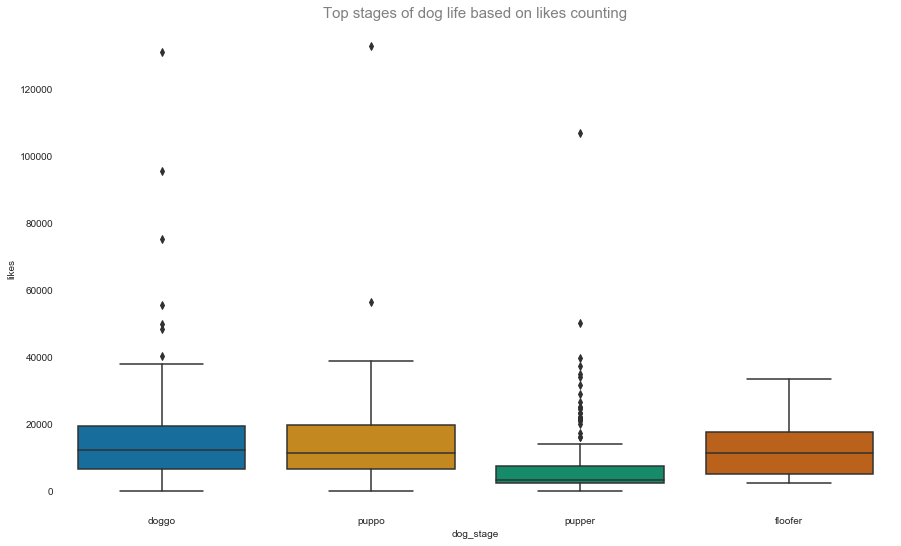

In [167]:
#plt.figure(figsize=(15,8))
#sns.set()
#bplot = sns.boxplot(data = df, x = "dog_stage", y = "likes", width=0.2, orient="v",palette="colorblind")

#plt.savefig('like_dog_stages.png', dpi=70, bbox_inches='tight');





# plot Boxplot for dog stages and favorite count

plt.figure(figsize=(15,9))
stages_faver = sns.boxplot(x='dog_stage', y='likes', data = df, palette='colorblind')
plt.title(label="Top stages of dog life based on likes counting" , fontsize=15, color='grey');

# save
plt.savefig('Dogs_Stages_likes', dpi=70, bbox_inches='tight');

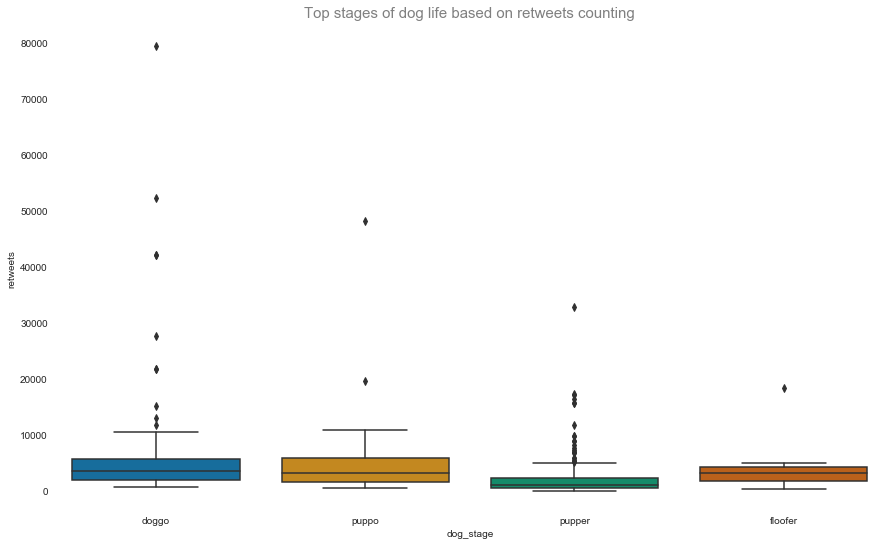

In [168]:
plt.figure(figsize=(15,9))
stages_faver = sns.boxplot(x='dog_stage', y='retweets', data = df, palette='colorblind')
plt.title(label="Top stages of dog life based on retweets counting" , fontsize=15, color='grey');

# save
plt.savefig('Dogs_Stages_retweets', dpi=70, bbox_inches='tight');

Based on the number of Retweets,likes and number of outliers, it obvious that Puppos are more popular on average than other stages of the dog.

<a id='insight2'></a>
## Insight 2: most dog breeds are commonly on the WeRateDogs 

In [169]:
df_breed = twitter_ana.query("breed_pre not in ['Unidentifiable']")
df_breed = df_breed.breed_pre.value_counts()
df_breed 

golden retriever               171
Labrador retriever             111
Pembroke                        94
Chihuahua                       93
pug                             65
toy poodle                      52
chow                            50
Samoyed                         46
Pomeranian                      40
malamute                        34
French bulldog                  32
cocker spaniel                  32
Chesapeake Bay retriever        29
miniature pinscher              26
Cardigan                        23
Staffordshire bullterrier       22
Eskimo dog                      22
beagle                          21
German shepherd                 21
Shih Tzu                        20
Rottweiler                      19
Maltese dog                     19
kuvasz                          19
Siberian husky                  19
Shetland sheepdog               19
Lakeland terrier                18
basset                          17
Italian greyhound               17
West Highland white 

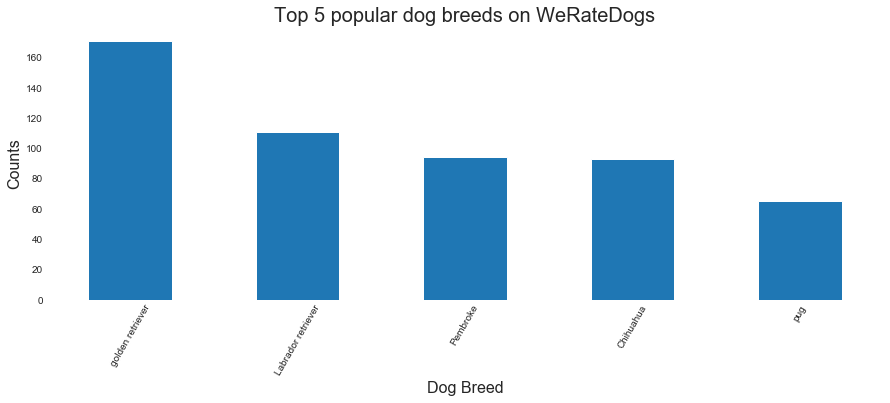

In [170]:
df_breed[:5].plot(kind = 'bar', figsize=(15,5))

#setup the title and the labels 
plt.title("Top 5 popular dog breeds on WeRateDogs",fontsize=20)
plt.xticks(rotation=60)
plt.xlabel("Dog Breed",fontsize= 16)
plt.ylabel("Counts",fontsize= 16)
sns.set_style("white")

plt.savefig('top_dog_breeds.png', dpi=70, bbox_inches='tight');

Based on the top three image predictions, the most common breeds of dog is Golden Retriever and then  Labrator Retrievers. 

<a id='insight3'></a>
## Insight 3: distribution of dog ratings out of ten

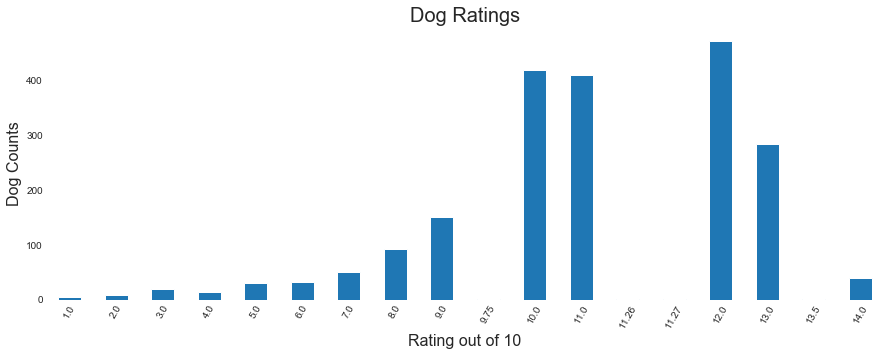

In [171]:
df_ratings = twitter_ana.rating_numerator.value_counts().sort_index()
df_ratings[:14].plot(kind = 'bar', figsize=(15,5))
#setup the title and the labels 
plt.title("Dog Ratings",fontsize=20)
plt.xticks(rotation=60)
plt.xlabel("Rating out of 10",fontsize= 16)
plt.ylabel("Dog Counts",fontsize= 16)
sns.set_style("white")

plt.savefig('Dog_Ratings.png', dpi=70, bbox_inches='tight');

12, 10 and 11 are the most dog rating out of ten. 

<a id='insight4'></a>
## Insight 4: account activity over the year

In [172]:
# count the year in date of created tweet
twitter_ana['timestamp']= pd.to_datetime(twitter_ana['timestamp']) 
date_tweet_count = twitter_ana['timestamp'].dt.year.value_counts() 
date_tweet_count

2016    1004
2015     650
2017     385
Name: timestamp, dtype: int64

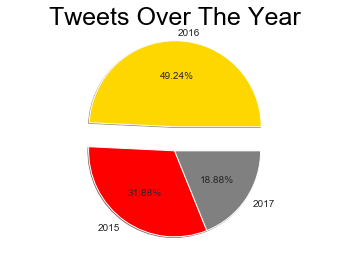

<Figure size 432x288 with 0 Axes>

In [173]:
# pie graph that shows the percentage of the tweet in the year of date strated
sizes = date_tweet_count
labels = '2016', '2015', '2017'
colors = ["gold", "red", "grey"]
explode = [0.7, 0, 0]
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%', radius = 2.5)
plt.title('Tweets Over The Year', fontsize = 25, loc = 'center', color = 'k')
plt.axis('equal') 
plt.show()

plt.savefig('Tweets_Over_Year.png', dpi=70, bbox_inches='tight');

account was active in 2016 more than in 2015 with 51% of all tweets in the database, and then decrease the number of tweets in 2017

### Retweets, Favorites and Ratings Correlation

In [175]:
# Create copy of twitter_archive_clean to work off of using only my variables of interest
time_df = twitter_ana[['timestamp', 'retweets', 'likes', 'rating_numerator', 'rating_denominator']].copy()

In [176]:
# Set the index to be the timestamp so time is displayed properly in plots
time_df.set_index('timestamp', inplace=True)

In [177]:
# Create rating_ration variable by dividing the rating numerator by the deonominator to normalize scores which are not 
# out of 10
time_df['rating_ratio'] = time_df['rating_numerator']/time_df['rating_denominator']

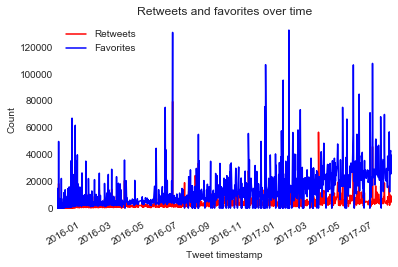

In [178]:
time_df['retweets'].plot(color = 'red', label='Retweets')
time_df['likes'].plot(color = 'blue', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show()

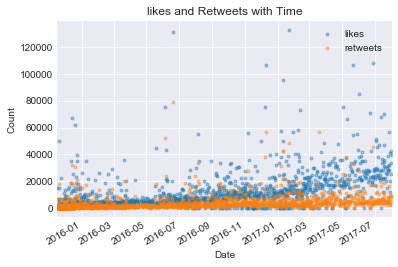

In [179]:
time_df[['likes', 'retweets']].plot(style = '.', alpha = 0.4)
plt.title('likes and Retweets with Time')
plt.xlabel('Date')
plt.ylabel('Count');

### Date vs. Tweets

In [180]:
temp = pd.DatetimeIndex(twitter_ana['timestamp'])

In [181]:
twitter_ana['Date'] = temp.date

In [182]:
twitter_ana['Year'] = temp.year

In [183]:
twitter_ana['Month'] = temp.month

In [184]:
twitter_ana['Month'].replace(1, 'January', inplace=True)
twitter_ana['Month'].replace(2, 'February', inplace=True)
twitter_ana['Month'].replace(3, 'March', inplace=True)
twitter_ana['Month'].replace(4, 'April', inplace=True)
twitter_ana['Month'].replace(5, 'May', inplace=True)
twitter_ana['Month'].replace(6, 'June', inplace=True)
twitter_ana['Month'].replace(7, 'July', inplace=True)
twitter_ana['Month'].replace(8, 'August', inplace=True)
twitter_ana['Month'].replace(9, 'September', inplace=True)
twitter_ana['Month'].replace(10, 'October', inplace=True)
twitter_ana['Month'].replace(11, 'November', inplace=True)
twitter_ana['Month'].replace(12, 'December', inplace=True)

In [185]:
twitter_ana['Day_of_Week'] = temp.dayofweek

In [186]:
twitter_ana['Day_of_Week'].replace(0, 'Monday', inplace=True)
twitter_ana['Day_of_Week'].replace(1, 'Tuesday', inplace=True)
twitter_ana['Day_of_Week'].replace(2, 'Wednesday', inplace=True)
twitter_ana['Day_of_Week'].replace(3, 'Thursday', inplace=True)
twitter_ana['Day_of_Week'].replace(4, 'Friday', inplace=True)
twitter_ana['Day_of_Week'].replace(5, 'Saturday', inplace=True)
twitter_ana['Day_of_Week'].replace(6, 'Sunday', inplace=True)

In [187]:
twitter_ana['Time'] = temp.time

In [188]:
twitter_ana['Hour'] = temp.hour

In [189]:
twitter_ana = twitter_ana.drop('timestamp', axis=1)

In [190]:
twitter_ana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 20 columns):
tweet_id              2039 non-null int64
source                2039 non-null object
text                  2039 non-null object
expanded_urls         2039 non-null object
rating_numerator      2039 non-null float64
rating_denominator    2039 non-null int64
name                  2039 non-null object
dog_stage             2039 non-null object
jpg_url               2039 non-null object
img_num               2039 non-null int64
breed_pre             2039 non-null object
confidence_pre        2039 non-null float64
likes                 2039 non-null int64
retweets              2039 non-null int64
Date                  2039 non-null object
Year                  2039 non-null int64
Month                 2039 non-null object
Day_of_Week           2039 non-null object
Time                  2039 non-null object
Hour                  2039 non-null int64
dtypes: float64(2), int64(7), object(1

**How many original tweets were posted per month?**

In [191]:
twitter_ana.groupby(['Month', 'Year'], 
                               sort=False).count().iloc[::-1, 0]

Month      Year
November   2015    290
December   2015    360
January    2016    164
February   2016    108
March      2016    120
April      2016     52
May        2016     56
June       2016     79
July       2016     92
August     2016     63
September  2016     70
October    2016     71
November   2016     68
December   2016     61
January    2017     77
February   2017     67
March      2017     53
April      2017     44
May        2017     46
June       2017     46
July       2017     50
August     2017      2
Name: tweet_id, dtype: int64

In [192]:
tweets_per_month = twitter_ana.groupby(['Month', 'Year'], 
                               sort=False).count().iloc[::-1, 0]

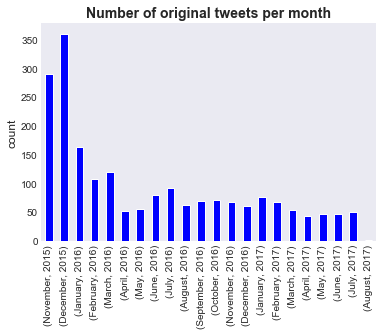

In [193]:
fig, ax = plt.subplots()
sns.set_style("white")
tweets_per_month.plot(kind='bar', color='b')
ax.set_title('Number of original tweets per month', fontsize=14, fontweight="bold")
ax.set_ylabel('count', fontsize=12)
ax.set_xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

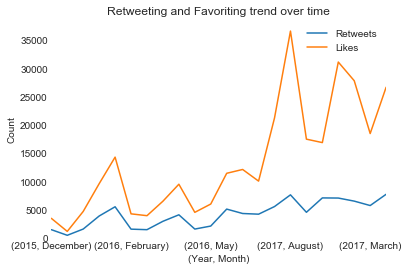

In [205]:
plt.subplots(1, sharex=True)
twitter_ana.retweets.groupby([twitter_ana['Year'], twitter_ana['Month']]).mean().plot('line')
twitter_ana.likes.groupby([twitter_ana['Year'], twitter_ana['Month']]).mean().plot('line').set_ylim(0, )
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Likes'))
plt.savefig('ret_fav')

**In which day of the week WeRateDogs posted most of its original tweets?**

In [194]:
sort_of_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday', 'Saturday']

In [195]:
plotting_days = pd.DataFrame(twitter_ana.groupby('Day_of_Week')['tweet_id'].count())

In [196]:
plotting_days.reset_index(inplace=True)
plotting_days = plotting_days.rename(columns={'tweet_id': 'count'})

In [197]:
plotting_days['Day_of_Week'] = plotting_days.Day_of_Week.astype("category")

In [198]:
plotting_days.Day_of_Week.cat.set_categories(sort_of_days, inplace=True)

In [199]:
plotting_days = plotting_days.sort_values('Day_of_Week')

In [200]:
plotting_days 

,Day_of_Week,count
1,Monday,333
5,Tuesday,306
6,Wednesday,309
4,Thursday,285
0,Friday,289
3,Sunday,257
2,Saturday,260


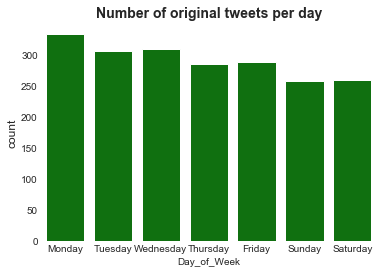

In [201]:
fig, ax = plt.subplots()
sns.set_style("white")
sns.barplot(x="Day_of_Week", y="count", data=plotting_days, color='g')
ax.set_title('Number of original tweets per day', fontsize=14, fontweight="bold")
ax.set_ylabel('count', fontsize=12)
plt.xticks(rotation='horizontal')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

**In which hour of the day WeRateDogs posted most of its original tweets?**

In [202]:
twitter_ana['Hour'].value_counts()

1     289
0     261
2     216
16    195
3     176
17    163
23    108
18    104
4      92
15     89
19     86
20     81
21     74
22     70
5      23
14      8
13      2
6       2
Name: Hour, dtype: int64

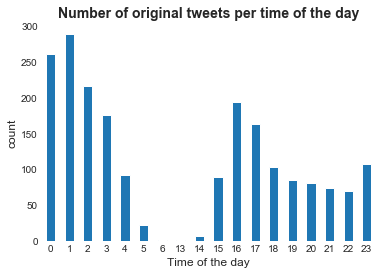

In [203]:
fig, ax = plt.subplots()
twitter_ana['Hour'].value_counts(sort=False).plot(kind='bar')
ax.set_title('Number of original tweets per time of the day', fontsize=14, fontweight="bold")
ax.set_ylabel('count', fontsize=12)
ax.set_xlabel('Time of the day', fontsize=12)
plt.xticks(rotation='horizontal') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)